In [1]:
import copy
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='D2Coding')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [2]:
df = pd.read_csv('../data/merged_delivery.csv', encoding='euc-kr')
df['총배송기간'] = df['출고기간'] + df['배송기간']
df

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),고객번호,구매금액,결제금액,물품대분류,상품명,수량추정,구매월,할인율,거주지역,출고기간,배송기간,구매요일,총배송기간
0,201905052342970,2019-05-06,2019-05-07,2019-05-11,4.0,201812310749735,25800,16314,수유용품,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2.000000,201905,0.37,인천,1,4,0,5
1,202002203424450,2020-02-20,2020-02-21,2020-02-23,14.0,201812310749735,51200,37769,5단계,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),1.155756,202002,0.26,인천,1,2,3,3
2,201905132367003,2019-05-13,2019-05-14,2019-05-16,66.0,201812310749771,59520,47922,3단계,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),1.125142,201905,0.19,부산,1,2,0,3
3,201905092356247,2019-05-10,2019-05-11,2019-05-13,5.0,201812310749774,50640,39788,3단계,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),1.000000,201905,0.21,경남,1,2,4,3
4,201907282649358,2019-07-29,2019-07-30,2019-08-02,8.0,201812310749774,101280,76744,3단계,[2019년형] 하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),3.421622,201907,0.24,경남,1,3,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166352,201912283245106,2019-12-29,2019-12-30,2020-01-01,0.0,201912281058006,3000,3000,이벤트,맘큐 허그박스,1.000000,201912,0.00,충남,1,2,6,3
166353,20200521172454-86563196093,2020-05-22,2020-05-23,2020-05-25,3.0,201912281058006,5900,5900,3단계,NEW 하기스 맥스드라이 3단계 공용 20매(밴드형/체험팩) (EA),1.000000,202005,0.00,충남,1,2,4,3
166354,202004103645638,2020-04-10,2020-04-11,2020-04-13,3.0,201912281058011,9500,7524,이벤트,더블하트 다기능 빨대 브러쉬,1.000000,202004,0.21,충북,1,2,4,3
166355,201912283245152,2019-12-29,2019-12-30,2020-01-02,-3.0,201912281058012,3000,3000,이벤트,맘큐 허그박스,1.000000,201912,0.00,서울,1,3,6,4


In [50]:
grouped_df = df.groupby('구매일', as_index=False)['총배송기간'].mean()
grouped_df.sort_values(by='총배송기간')

,구매일,총배송기간
556,2020-07-14,3.000000
506,2020-05-25,3.200000
61,2019-03-03,3.231579
484,2020-05-03,3.247863
504,2020-05-23,3.250000
...,...,...
23,2019-01-24,3.543860
19,2019-01-20,3.550000
519,2020-06-07,3.583333
114,2019-04-26,4.000000


In [51]:
df['구매일'] = pd.to_datetime(df['구매일'])
temp = df[df['구매일'] < pd.to_datetime('2020-08-01')]
temp = temp[~(temp['구매일'] == '2019-04-27')]
temp = temp[~(temp['구매일'] == '2019-04-26')]
temp = temp[~(temp['구매일'] == '2019-07-14')]

Text(0.5, 1.0, '주문 건수에 따른 평균소요시간')

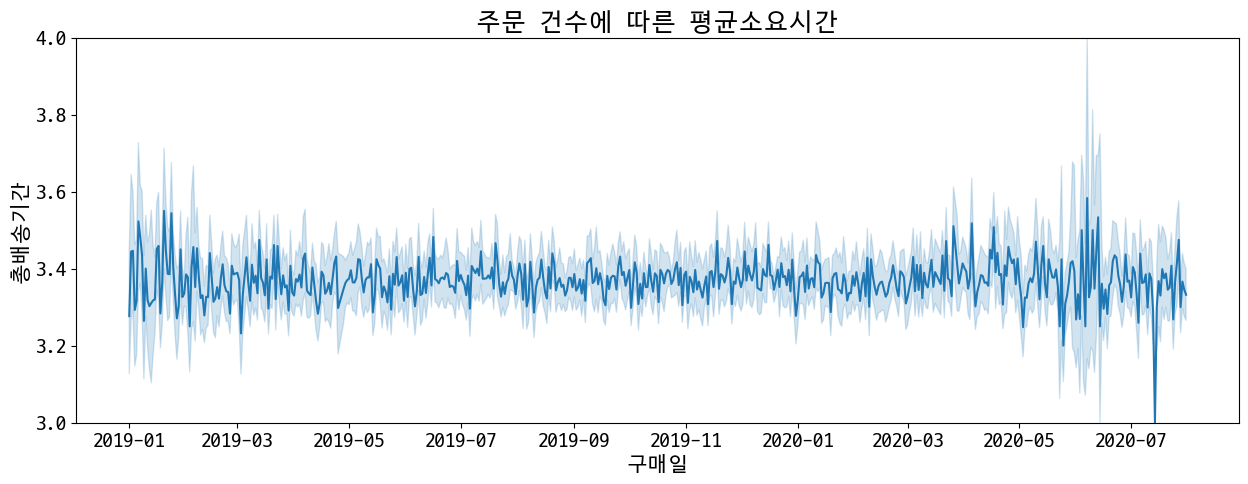

In [52]:
# df = pd.read_csv('../data/merged_delivery.csv', encoding='euc-kr')
# df['총배송기간'] = df['출고기간'] + df['배송기간']

# df_grouped = df.groupby('구매일', as_index=False)['총배송기간'].mean()

plt.rc('font', size=15)
plt.figure(figsize=(15, 5))
sns.lineplot(data=temp, x='구매일', y='총배송기간')
# plt.xticks(rotation=90)
plt.ylim(3, 4)

plt.title('주문 건수에 따른 평균소요시간')

Text(0.5, 1.0, '주문 건수에 따른 평균소요시간')

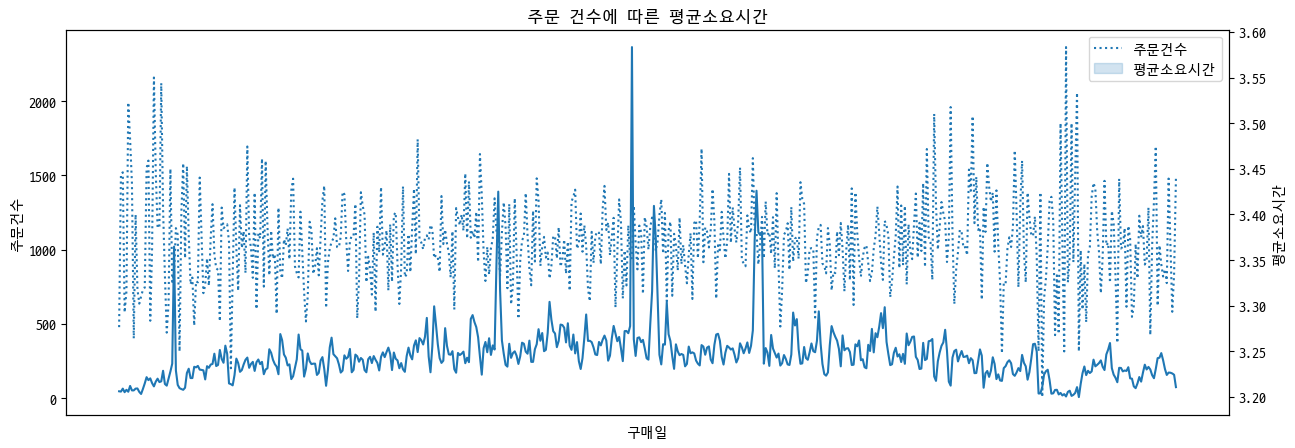

In [4]:
df_grouped = df.groupby('구매일', as_index=False)['주문번호'].count()
df_grouped['평균소요시간'] = df.groupby('구매일')['총배송기간'].mean().values
df_grouped.rename(columns={'주문번호': '주문건수'}, inplace=True)
df_grouped = df_grouped[(df_grouped['구매일'] != '2019-04-26') & (df_grouped['구매일'] != '2019-04-27') & (df_grouped['구매일'] != '2020-07-14')]

plt.figure(figsize=(15, 5))
sns.lineplot(data=df_grouped, x='구매일', y='주문건수')

ax2 = plt.twinx()
sns.lineplot(data=df_grouped, x='구매일', y='평균소요시간', ax=ax2, ls=':')
plt.xticks([])
plt.legend(['주문건수', '평균소요시간'], loc='upper right')
plt.title('주문 건수에 따른 평균소요시간')

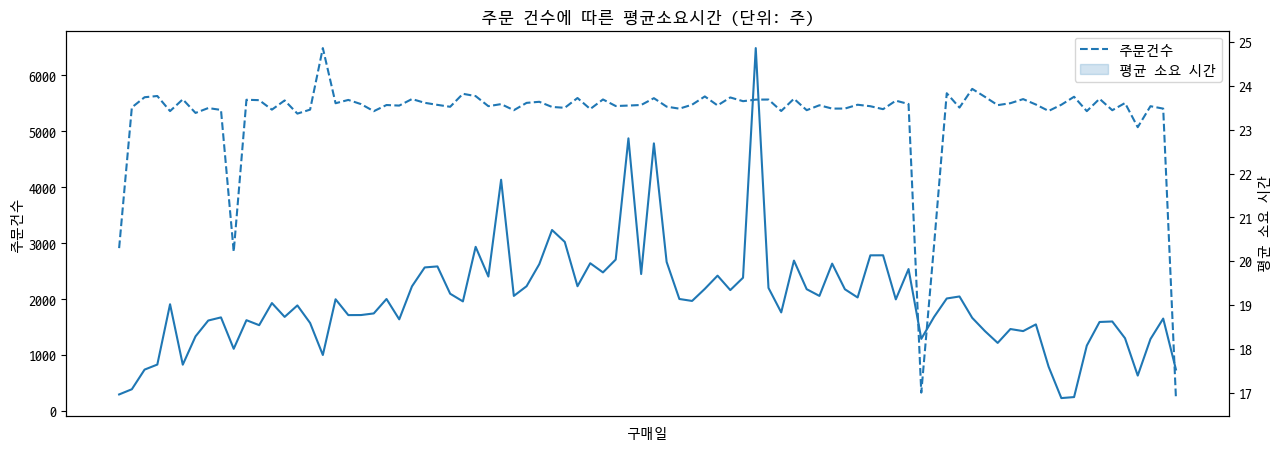

In [5]:
df_grouped = df.groupby('구매일', as_index=False)['주문번호'].count()
df_grouped['평균 소요 시간'] = df.groupby('구매일')['총배송기간'].mean().values
df_grouped.rename(columns={'주문번호': '주문건수'}, inplace=True)
df_grouped['구매일'] = pd.to_datetime(df_grouped['구매일'])
df_grouped = df_grouped.resample('W', on='구매일').sum().reset_index()

plt.figure(figsize=(15, 5))
sns.lineplot(data=df_grouped, x='구매일', y='주문건수')

ax2 = plt.twinx()
sns.lineplot(data=df_grouped, x='구매일', y='평균 소요 시간', ax=ax2, ls='--')
plt.xticks([])
plt.title('주문 건수에 따른 평균소요시간 (단위: 주)')
plt.legend(['주문건수', '평균 소요 시간'])